<a href="https://colab.research.google.com/github/sadicsha/SADICSHA_KHANDAIT_Python_basic_codes/blob/main/Python_logging_library.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logging Library

(Source: https://docs.python.org/3/library/logging.html)

This module defines functions and classes which implement a flexible event logging system for applications and libraries.

The key benefit of having the logging API provided by a standard library module is that all Python modules can participate in logging, so your application log can include your own messages integrated with messages from third-party modules.

The module provides a lot of functionality and flexibility. If you are unfamiliar with logging, the best way to get to grips with it is to see the tutorials (see the links on the right).

The basic classes defined by the module, together with their functions, are listed below.

Loggers expose the interface that application code directly uses.

Handlers send the log records (created by loggers) to the appropriate destination.

Filters provide a finer grained facility for determining which log records to output.

Formatters specify the layout of log records in the final output.

**Logger Objects**

Loggers have the following attributes and methods. Note that Loggers should NEVER be instantiated directly, but always through the module-level function logging.getLogger(name). Multiple calls to getLogger() with the same name will always return a reference to the same Logger object.

The name is potentially a period-separated hierarchical value, like foo.bar.baz (though it could also be just plain foo, for example). Loggers that are further down in the hierarchical list are children of loggers higher up in the list. For example, given a logger with a name of foo, loggers with names of foo.bar, foo.bar.baz, and foo.bam are all descendants of foo. The logger name hierarchy is analogous to the Python package hierarchy, and identical to it if you organise your loggers on a per-module basis using the recommended construction logging.getLogger(__name__). That’s because in a module, __name__ is the module’s name in the Python package namespace.



**There are two built-in levels of the log message.**


1. Debug : These are used to give Detailed information, typically of interest only when diagnosing problems.

2. Info : These are used to Confirm that things are working as expected

3. Warning : These are used an indication that something unexpected happened, or indicative of some problem in the near future

4. Error : This tells that due to a more serious problem, the software has not been able to perform some function
Critical : This tells serious error, indicating that the program itself may be unable to continue running

**Logging module is packed with several features.** It has several constants, classes, and methods. The items with all caps are constant, the capitalize items are classes and the items which start with lowercase letters are methods.
There are several logger objects offered by the module itself.


1. Logger.info(msg) : This will log a message with level INFO on this logger.
2. Logger.warning(msg) : This will log a message with level WARNING on this logger.
3. Logger.error(msg) : This will log a message with level ERROR on this logger.
4. Logger.critical(msg) : This will log a message with level CRITICAL on this logger.
5. Logger.log(lvl,msg) : This will Logs a message with integer level lvl on this logger.
6. Logger.exception(msg) : This will log a message with level ERROR on this logger.
7. Logger.setLevel(lvl) : This function sets the threshold of this logger to lvl. This means that all the messages below this level will be ignored.
8. Logger.addFilter(filt) : This adds a specific filter filt to the to this logger.
9. Logger.removeFilter(filt) : This removes a specific filter filt to the to this logger.
10. Logger.filter(record) : This method applies the logger’s filter to the record provided and returns True if record is to be processed. Else, it will return False.
11. Logger.addHandler(hdlr) : This adds a specific handler hdlr to the to this logger.
12. Logger.removeHandler(hdlr) : This removes a specific handler hdlr to the to this logger.
13. Logger.hasHandlers() : This checks if the logger has any handler configured or not.

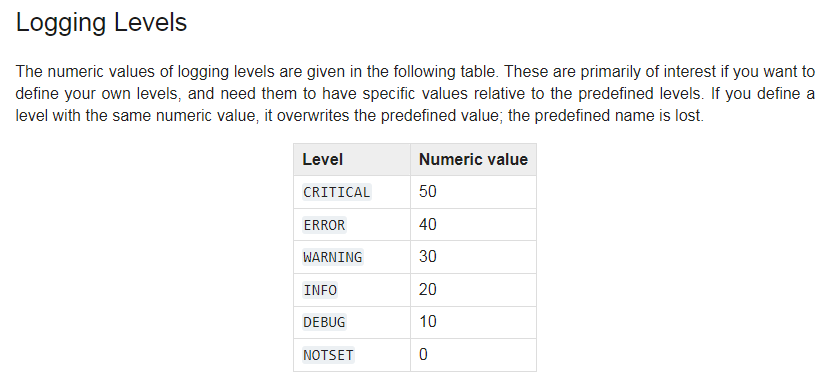

In [ ]:

#importing module
import logging
  
#Create and configure logger
logging.basicConfig(filename="newfile.log",
                    format='%(asctime)s %(message)s',
                    filemode='w')
  
#Creating an object
logger=logging.getLogger()
  
#Setting the threshold of logger to DEBUG
logger.setLevel(logging.DEBUG)
  
#Test messages
logger.debug("Harmless debug Message")
logger.info("Just an information")
logger.warning("Its a Warning")
logger.error("Did you try to divide by zero")
logger.critical("Internet is down")

In [ ]:
import logging
import sys
logging.basicConfig(
    format="{asctime} {levelname:<8} {message}",
    style="{",
    level=logging.DEBUG,
    stream=sys.stdout,
)
logging.info("Hello World!")

In [ ]:
import datetime
import logging
import sys
logger = logging.getLogger(__name__)
class OnWeekendOnlyErrorsFilter(logging.Filter):
    def filter(self, record):
        is_weekday = datetime.datetime.today().weekday() < 5
        return is_weekday or record.levelno >= logging.ERROR
stdout_handler = logging.StreamHandler(sys.stdout)
stdout_handler.setLevel(logging.WARNING)
stdout_handler.addFilter(OnWeekendOnlyErrorsFilter())
logger.addHandler(stdout_handler)

In [ ]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import logging
import logging.handlers
from logging.config import dictConfig

logger = logging.getLogger(__name__)

DEFAULT_LOGGING = {
    'version': 1,
    'disable_existing_loggers': False,
}
def configure_logging(logfile_path):
    """
    Initialize logging defaults for Project.

    :param logfile_path: logfile used to the logfile
    :type logfile_path: string

    This function does:

    - Assign INFO and DEBUG level to logger file handler and console handler

    """
    dictConfig(DEFAULT_LOGGING)

    default_formatter = logging.Formatter(
        "[%(asctime)s] [%(levelname)s] [%(name)s] [%(funcName)s():%(lineno)s] [PID:%(process)d TID:%(thread)d] %(message)s",
        "%d/%m/%Y %H:%M:%S")

    file_handler = logging.handlers.RotatingFileHandler(logfile_path, maxBytes=10485760,backupCount=300, encoding='utf-8')
    file_handler.setLevel(logging.INFO)

    console_handler = logging.StreamHandler()
    console_handler.setLevel(logging.DEBUG)

    file_handler.setFormatter(default_formatter)
    console_handler.setFormatter(default_formatter)

    logging.root.setLevel(logging.DEBUG)
    logging.root.addHandler(file_handler)
    logging.root.addHandler(console_handler)


In [ ]:
import logging.config

logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s [%(levelname)s] %(message)s",
    handlers=[
        logging.FileHandler("log_file.log"),
        logging.StreamHandler()
    ]
)
logger = logging.getLogger(__name__)

In [ ]:
'''
import os
import sys
import logging
import logging.config

sys.path.append(os.path.realpath("shared/"))
sys.path.append(os.path.realpath("tests/"))

class Main(object):

  @staticmethod
  def main():
    logging.config.fileConfig("logging.conf")
    logging.debug("1")
    logging.info("2")
    logging.warn("3")
    logging.error("4")
    logging.critical("5")

if __name__ == "__main__":
  Main.main()
  '''

In [ ]:
def get_logger(cls,logger_name,create_file=False):

        # create logger for prd_ci
        log = logging.getLogger(logger_name)
        log.setLevel(level=logging.INFO)

        # create formatter and add it to the handlers
        formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')

        if create_file:
                # create file handler for logger.
                fh = logging.FileHandler('SPOT.log')
                fh.setLevel(level=logging.DEBUG)
                fh.setFormatter(formatter)
        # reate console handler for logger.
        ch = logging.StreamHandler()
        ch.setLevel(level=logging.DEBUG)
        ch.setFormatter(formatter)

        # add handlers to logger.
        if create_file:
            log.addHandler(fh)

        log.addHandler(ch)
        return  log

In [ ]:
def setup_logging(log_dir):
    log_file_format = "[%(levelname)s] - %(asctime)s - %(name)s - : %(message)s in %(pathname)s:%(lineno)d"
    log_console_format = "[%(levelname)s]: %(message)s"

    # Main logger
    main_logger = logging.getLogger()
    main_logger.setLevel(logging.INFO)

    console_handler = logging.StreamHandler()
    console_handler.setLevel(logging.INFO)
    console_handler.setFormatter(Formatter(log_console_format))

    exp_file_handler = RotatingFileHandler('{}exp_debug.log'.format(log_dir), maxBytes=10**6, backupCount=5)
    exp_file_handler.setLevel(logging.DEBUG)
    exp_file_handler.setFormatter(Formatter(log_file_format))

    exp_errors_file_handler = RotatingFileHandler('{}exp_error.log'.format(log_dir), maxBytes=10**6, backupCount=5)
    exp_errors_file_handler.setLevel(logging.WARNING)
    exp_errors_file_handler.setFormatter(Formatter(log_file_format))

    main_logger.addHandler(console_handler)
    main_logger.addHandler(exp_file_handler)
    main_logger.addHandler(exp_errors_file_handler) 

In [ ]:
def init_logging(log_file=None, append=False, console_loglevel=logging.INFO):
    """Set up logging to file and console."""
    if log_file is not None:
        if append:
            filemode_val = 'a'
        else:
            filemode_val = 'w'
        logging.basicConfig(level=logging.DEBUG,
                            format="%(asctime)s %(levelname)s %(threadName)s %(name)s %(message)s",
                            # datefmt='%m-%d %H:%M',
                            filename=log_file,
                            filemode=filemode_val)
    # define a Handler which writes INFO messages or higher to the sys.stderr
    console = logging.StreamHandler()
    console.setLevel(console_loglevel)
    # set a format which is simpler for console use
    formatter = logging.Formatter("%(message)s")
    console.setFormatter(formatter)
    # add the handler to the root logger
    logging.getLogger('').addHandler(console)
    global LOG
    LOG = logging.getLogger(__name__) 

In [ ]:
def setup_logging():
    # Setup root logger
    logger = logging.getLogger('drydock')
    logger.setLevel('DEBUG')
    ch = logging.StreamHandler()
    formatter = logging.Formatter(
        '%(asctime)s - %(levelname)s - %(filename)s:%(funcName)s - %(message)s'
    )
    ch.setFormatter(formatter)
    logger.addHandler(ch)

    # Specalized format for API logging
    logger = logging.getLogger('drydock.control')
    logger.propagate = False
    formatter = logging.Formatter(
        "%(asctime)s - %(levelname)s - %(user)s - %(req_id)s"
        " - %(external_ctx)s - %(end_user)s - %(message)s"
    )

    ch = logging.StreamHandler()
    ch.setFormatter(formatter)
    logger.addHandler(ch) 

In [ ]:
def get_logger(cls, logger_name, create_file=False):

        # create logger for prd_ci
        log = logging.getLogger(logger_name)
        log.setLevel(level=logging.INFO)

        # create formatter and add it to the handlers
        formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')

        if create_file:
            # create file handler for logger.
            fh = logging.FileHandler('oa.log')
            fh.setLevel(level=logging.DEBUG)
            fh.setFormatter(formatter)
        # reate console handler for logger.
        ch = logging.StreamHandler()
        ch.setLevel(level=logging.DEBUG)
        ch.setFormatter(formatter)

        # add handlers to logger.
        if create_file:
            log.addHandler(fh)

        log.addHandler(ch)
        return log 

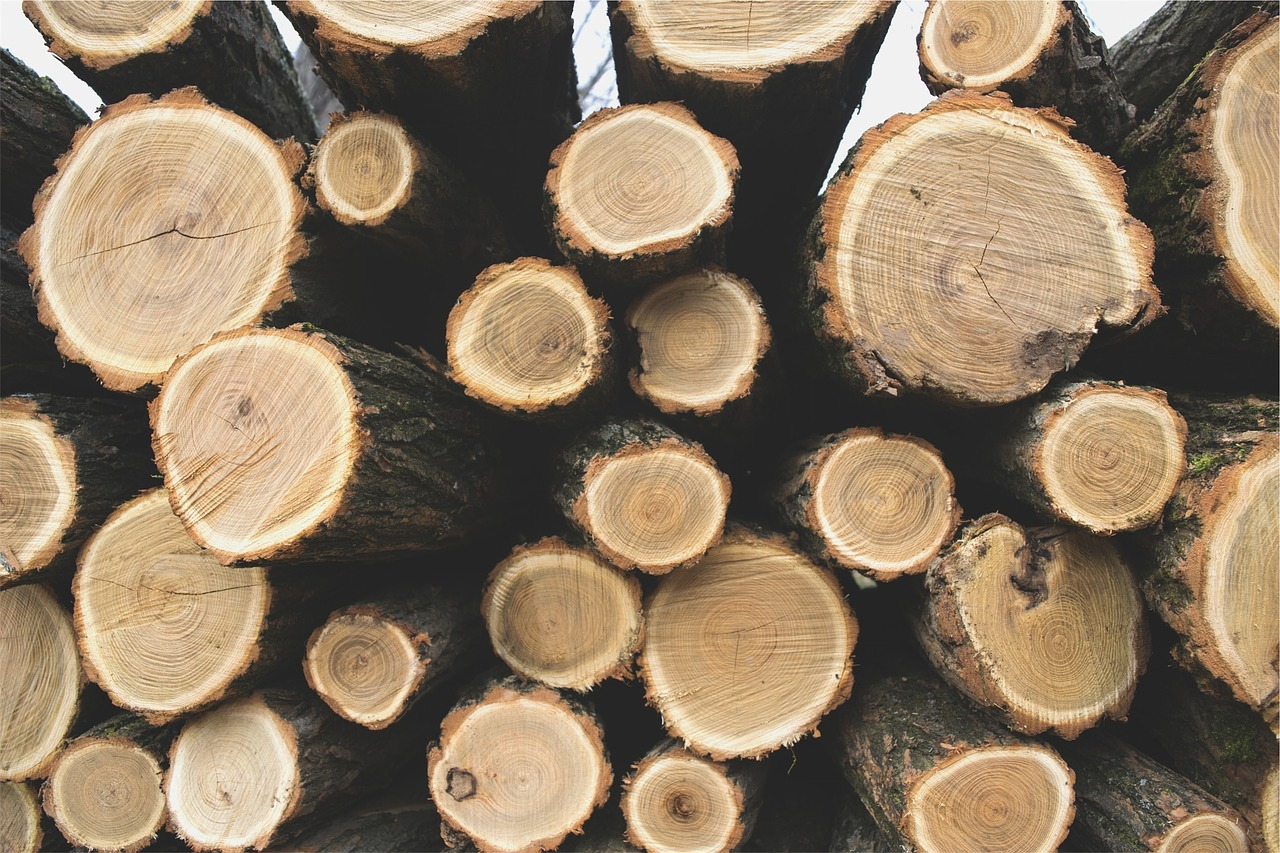